In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
data.describe()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


удаляем Healthcare_1

In [4]:
data = data.drop(['Healthcare_1'],axis=1)

приводим в порядок годы постройки

In [5]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008
data.loc[data['HouseYear']==4968,'HouseYear']=1968

### приводим в порядок этажность FUN

In [6]:
data.loc[data['HouseFloor']==99, 'HouseFloor'] = 9
data.loc[data['HouseFloor']==117, 'HouseFloor'] = 11
data.loc[data['HouseFloor']==0, 'HouseFloor'] = data['Floor']


In [7]:
def prepare_floor(df):
    df.loc[df['Floor']>df['HouseFloor'], ['HouseFloor']]=df['Floor']
    return df

In [8]:
data = prepare_floor(data)

приводим в порядок комнаты

In [9]:
data['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [10]:
data.loc[data['Rooms']==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,4.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,13.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,16.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,4.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,1.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [11]:
data.loc[(data['Rooms']==0)&(data['Square']>80), 'Rooms'] =3
data.loc[(data['Rooms']==0)&(data['Square'].between(30, 79, inclusive=True)), 'Rooms'] =2
data.loc[(data['Rooms']==0)&(data['Square']<30), 'Rooms'] =1

In [12]:
data.loc[(data['Rooms']>5)&(data['Square']>43), 'Rooms'] =2
data.loc[(data['Rooms']>5)&(data['Square']<43), 'Rooms'] =1

In [13]:
data['Rooms'].describe()

count    10000.000000
mean         1.888600
std          0.811453
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: Rooms, dtype: float64

### приводим в порядок общую площадь FUN

In [14]:
data['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [15]:
data.loc[data['Square']<data['LifeSquare'], ['Square']] = data['LifeSquare']

In [16]:
def prepare_square(df):
    df.loc[df['Square']>df['Rooms']*32+40, 'Square'] = df['Rooms']*32+40
    df.loc[df['Square']<df['Rooms']*15, 'Square'] =df['Rooms']*15
    return df

In [17]:
data =prepare_square(data)

In [18]:
data['Square'].describe()

count    10000.000000
mean        56.124412
std         18.463835
min         15.000000
25%         41.882259
50%         52.659376
75%         66.009137
max        200.000000
Name: Square, dtype: float64

### подгатавливаем жилую площадь FUN

In [19]:
def fillna_lifesquare(df, source_df):
    df['LifeSquare']=df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    return df

In [20]:
data=fillna_lifesquare(data, data)

добавляем стоимость М2

In [24]:
data['Price_per_sm']=data['Price']/data['Square']

In [22]:
data.loc[data['Price_per_sm']>15000, 'Price'] = 160000

In [ ]:
data['Price_per_sm']=data['Price']/data['Square']

In [25]:
data['Price_per_sm'].describe()

count    10000.000000
mean      3893.396131
std       1259.716301
min        752.588644
25%       2913.750403
50%       3907.999942
75%       4693.251326
max      12095.655039
Name: Price_per_sm, dtype: float64

### создание моделей

In [26]:
data =pd.get_dummies(data)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
Price_per_sm     10000 non-null float64
Ecology_2_A      10000 non-null uint8
Ecology_2_B      10000 non-null uint8
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
dt

In [28]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Price_per_sm',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B'],
      dtype='object')

In [113]:
target=data['Price']
features=data[['DistrictId', 'Rooms', 'Square', 'LifeSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B']]

модель LR

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression as LR

In [33]:
from sklearn.ensemble import RandomForestRegressor as RF

In [34]:
model1=LR()

In [35]:
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
y_pred = model1.predict(X_test)

In [37]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [38]:
r2(y_test, y_pred)

0.5160471286055586

Model2 RF

In [39]:
model2=RF(n_estimators=150, max_depth=15, min_samples_leaf=4)

In [40]:
model2.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [41]:
y_pred_2 = model2.predict(X_test)

In [42]:
r2(y_test, y_pred_2)

0.7050940724001593

### в итоге данная модель показала лучший результат, на ее основе делаем прадсказания для теста

In [95]:
test = test.drop(['Healthcare_1'],axis=1)

KeyError: "['Healthcare_1'] not found in axis"

In [96]:
test = prepare_square(test)

In [97]:
test = fillna_lifesquare(test,data)

In [98]:
test = prepare_floor(test)

In [99]:
test =pd.get_dummies(test)


In [109]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       5000 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Ecology_2_A      5000 non-null uint8
Ecology_2_B      5000 non-null uint8
Ecology_3_A      5000 non-null uint8
Ecology_3_B      5000 non-null uint8
Shops_2_A        5000 non-null uint8
Shops_2_B        5000 non-null uint8
dtypes: float64(6), int64(9), uint8(6)
memory usage: 615.3 KB


In [121]:
features.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B'],
      dtype='object')

In [122]:
test.loc[:,['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']]

,DistrictId,Rooms,Square,LifeSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,58,2.0,49.882643,33.432782,6,14.0,1972,0.310199,11,2748,1,0,0,0,1,0,1,0,1
1,74,2.0,69.263183,37.199645,6,6.0,1977,0.075779,6,1437,3,0,2,0,1,0,1,0,1
2,190,1.0,15.000000,15.948246,2,5.0,1909,0.000000,30,7538,87,5,5,0,1,0,1,0,1
3,47,2.0,73.046609,51.940842,22,22.0,2007,0.101872,23,4583,3,3,3,0,1,0,1,0,1
4,27,1.0,47.527111,43.387569,17,17.0,2017,0.072158,2,629,1,0,0,0,1,0,1,1,0
5,53,1.0,40.675627,37.199645,21,21.0,1977,0.049637,34,7759,0,1,3,0,1,0,1,0,1
6,23,2.0,68.099538,64.843025,2,17.0,1977,0.075779,6,1437,3,0,2,0,1,0,1,0,1
7,32,2.0,48.193897,32.857644,5,14.0,1972,0.135650,46,7960,6,3,11,0,1,0,1,0,1
8,96,3.0,72.277106,45.968758,17,17.0,1997,0.041116,53,14892,4,1,4,0,1,0,1,0,1
9,6,3.0,80.219400,47.660260,13,17.0,2014,0.243205,5,1564,0,0,0,0,1,0,1,0,1


In [126]:
y_pred_test= model2.predict(test. loc[:,['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A',
       'Ecology_3_B', 'Shops_2_A', 'Shops_2_B']])

In [127]:
y_pred_test.shape

(5000,)

In [128]:
result = pd.concat([test['Id'],pd.Series(y_pred_test)], axis=1).rename(columns={0:'Price'})

In [129]:
result.to_csv('AKrylov_predictions.csv', index=None)

Модель 3

In [53]:
train,valid=train_test_split(data,test_size=0.3, random_state=42)

In [54]:
price=train['Price'].mean()
price_mean_by_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_rooms

,Rooms,mean_price_by_rooms
0,1.0,159778.081649
1,2.0,215287.964617
2,3.0,290803.045260
3,4.0,385776.526291
4,5.0,386743.536446


In [55]:
train.shape,valid.shape

((7000, 23), (3000, 23))

In [56]:
scaler=MinMaxScaler()

In [57]:
train_scaled=scaler.fit_transform(train.loc[:,['DistrictId','HouseYear']])

In [58]:
inertia_arr=[]
for i in range(2,10):
    temp_model=KMeans(n_clusters=i,random_state=100)
    temp_model.fit(train_scaled)
    temp_inertia=temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

275.66445745306356
154.21399483107405
118.3431848228601
89.93523795191453
75.4878225357024
63.4514761493608
56.38962806028711
50.12326901734022


Text(0.5, 1.0, 'INERTIA')

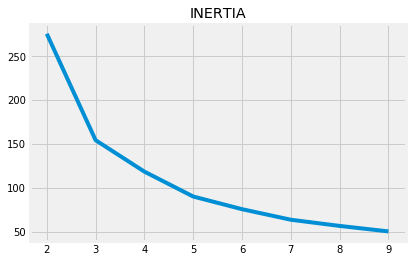

In [59]:
plt.plot([i for i in range(2,10) ],inertia_arr)
plt.title('INERTIA')

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
model=AgglomerativeClustering(n_clusters=3)

In [62]:
train['cluster_year']=model.fit_predict(train_scaled)

Text(0.5, 1.0, 'Train')

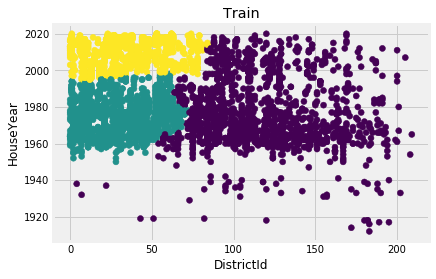

In [63]:
plt.scatter(train['DistrictId'],train['HouseYear'],c=train['cluster_year'])
plt.xlabel('DistrictId')
plt.ylabel('HouseYear')
plt.title('Train')

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
knn=KNeighborsClassifier(n_neighbors=3)

In [66]:
knn.fit(train_scaled,train['cluster_year'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
valid_scaled=scaler.transform(valid.loc[:,['DistrictId','HouseYear']])

In [68]:
valid['cluster_year']=knn.predict(valid_scaled)

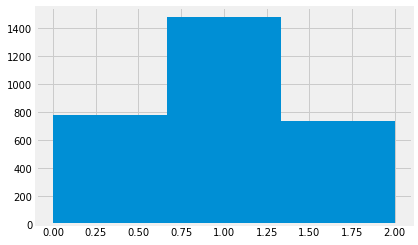

In [69]:
valid['cluster_year'].hist(bins=3)

In [70]:
distr_info1=train['DistrictId'].value_counts().reset_index().\
    rename(columns={"index":"DistrictId","DistrictId":'large_district'})

In [71]:
distr_info1.head(15)

,DistrictId,large_district
0,27,574
1,1,466
2,23,394
3,6,355
4,9,222
5,62,175
6,30,160
7,53,133
8,58,118
9,21,107


In [72]:
distr_info1['is_large']=(distr_info1['large_district']>100).astype(int)

In [73]:
distr_info1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 3 columns):
DistrictId        202 non-null int64
large_district    202 non-null int64
is_large          202 non-null int32
dtypes: int32(1), int64(2)
memory usage: 4.0 KB


In [74]:
def add_distr_info(df,distr_info1):
    df=pd.merge(df,distr_info1,on='DistrictId',how='left')
    df['is_large']=df['is_large'].fillna(0)
    df['large_district']=df['large_district'].fillna(1)
    return df

In [75]:
price=train['Price'].mean()
price_mean_by_rooms=train.groupby(['Rooms'],as_index=False).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_by_rooms'})
price_mean_by_distr_rooms=train.groupby(['DistrictId','Rooms'],as_index=False).agg({'Price':'mean'}).\
                    rename(columns={'Price':'mean_price_dr'})

In [76]:
price_mean_by_rooms.head()

,Rooms,mean_price_by_rooms
0,1.0,159778.081649
1,2.0,215287.964617
2,3.0,290803.045260
3,4.0,385776.526291
4,5.0,386743.536446


In [77]:
price_mean_by_distr_rooms.head()

,DistrictId,Rooms,mean_price_dr
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383


In [78]:
def add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=pd.merge(df,price_mean_by_distr_rooms,on=['DistrictId','Rooms'],how='left')
    df=pd.merge(df,price_mean_by_rooms,on='Rooms',how='left') 
    df['mean_price_dr']=df['mean_price_dr'].fillna(df['mean_price_by_rooms'])
    df['mean_price_dr']=df['mean_price_dr'].fillna(price)
    df['mean_price_by_rooms']= df['mean_price_by_rooms'].fillna(price)
    return df

In [79]:
def prepare_data(df,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price):
    df=add_distr_info(df,distr_info1)
    df=add_mean_price(df,price_mean_by_distr_rooms,price_mean_by_rooms,price)
    return df

In [80]:
train=prepare_data(train,distr_info1,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 0 to 6999
Data columns (total 28 columns):
Id                     7000 non-null int64
DistrictId             7000 non-null int64
Rooms                  7000 non-null float64
Square                 7000 non-null float64
LifeSquare             7000 non-null float64
KitchenSquare          7000 non-null float64
Floor                  7000 non-null int64
HouseFloor             7000 non-null float64
HouseYear              7000 non-null int64
Ecology_1              7000 non-null float64
Social_1               7000 non-null int64
Social_2               7000 non-null int64
Social_3               7000 non-null int64
Helthcare_2            7000 non-null int64
Shops_1                7000 non-null int64
Price                  7000 non-null float64
Price_per_sm           7000 non-null float64
Ecology_2_A            7000 non-null uint8
Ecology_2_B            7000 non-null uint8
Ecology_3_A            7000 non-null uint8
Ecology_3_B      

In [82]:
def dummies(df,cluster_year='cluster_year'):
    df[cluster_year]=df[cluster_year].astype(object)
    df=pd.get_dummies(df)
    return df

In [83]:
train=dummies(train)

In [84]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Price_per_sm',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'large_district', 'is_large', 'mean_price_dr',
       'mean_price_by_rooms', 'cluster_year_0', 'cluster_year_1',
       'cluster_year_2'],
      dtype='object')

In [86]:
feats=['DistrictId', 'Rooms', 'Square', 'LifeSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'large_district', 'is_large', 'mean_price_dr', 'mean_price_by_rooms']

In [87]:
from sklearn.ensemble import RandomForestRegressor as RF

In [88]:
model=RF(n_estimators=40,max_depth=10,random_state=42)

In [89]:
model.fit(train.loc[:,feats],train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [90]:
valid=add_distr_info(valid,distr_info1)
valid=add_mean_price(valid,price_mean_by_distr_rooms,price_mean_by_rooms,price)

In [91]:
from sklearn.ensemble import RandomForestRegressor as RF

In [92]:
y_pred=model.predict(valid.loc[:,feats])

In [118]:
valid.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2',
       'Social_3', 'Helthcare_2', 'Shops_1', 'Price', 'Price_per_sm',
       'Ecology_2_A', 'Ecology_2_B', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A',
       'Shops_2_B', 'cluster_year', 'large_district', 'is_large',
       'mean_price_dr', 'mean_price_by_rooms'],
      dtype='object')

In [119]:
valid.loc[:,feats].columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'large_district', 'is_large', 'mean_price_dr',
       'mean_price_by_rooms'],
      dtype='object')

In [93]:
from sklearn.metrics import r2_score as r2

In [94]:
r2(valid['Price'],y_pred)

0.6688524743268303

результат 0,66 ниже чему у модели 2